# Importing Libraries

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
#from mlxtend.classifier import StackingCVClassifier

# Reading the data sets

In [2]:
data = pd.read_csv("framingham.csv") # Reading and converting the data into a pandas dataframe

In [3]:
data.shape

(4240, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


From the information above through the data.info, we can tell that the total entries of the data were 4240 and education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose all had some null values

In [5]:
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [6]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

we can see that null values or missing values are present in the dataset:

education: 105
cigsPerDay: 29
BPMeds: 53
totChol: 50
BMI: 19
heartRate: 1
glucose: 388

Attributes:

sex: male(0) or female(1);(Nominal)
age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
currentSmoker: whether or not the patient is a current smoker (Nominal)
cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
BPMeds: whether or not the patient was on blood pressure medication (Nominal)
prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
prevalentHyp: whether or not the patient was hypertensive (Nominal)
diabetes: whether or not the patient had diabetes (Nominal)
totChol: total cholesterol level (Continuous)
sysBP: systolic blood pressure (Continuous)
diaBP: diastolic blood pressure (Continuous)
BMI: Body Mass Index (Continuous)
heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of a large number of possible values.)
glucose: glucose level (Continuous)
10 year risk of coronary heart disease CHD (binary: “1” means “Yes”, “0” means “No”) - Target Variable

In [7]:
data.duplicated().sum()

0

This shows that there are no duplicated values in the data sets. This also means that there are no duplicated rows in the dataframe. This is a good sign and indicates that the data is clean and does not require any further cleaning or preprocessing for duplicated rows.

Let's check for the mode of glucose so that we can replace this null values with the mode

In [8]:
print((data['glucose'].mode()))

0    75.0
dtype: float64


In [9]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

we have filled the missing values of glucose with the mode to reduce the missing data. This is because there are alot of missing data and we don't want to remove everything.

In [10]:
data.dropna(inplace=True)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Lets do a box plot of the data 

<ipython-input-11-7877c84d8390>:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  plt.figure(figsize=(20,10), facecolor='W')


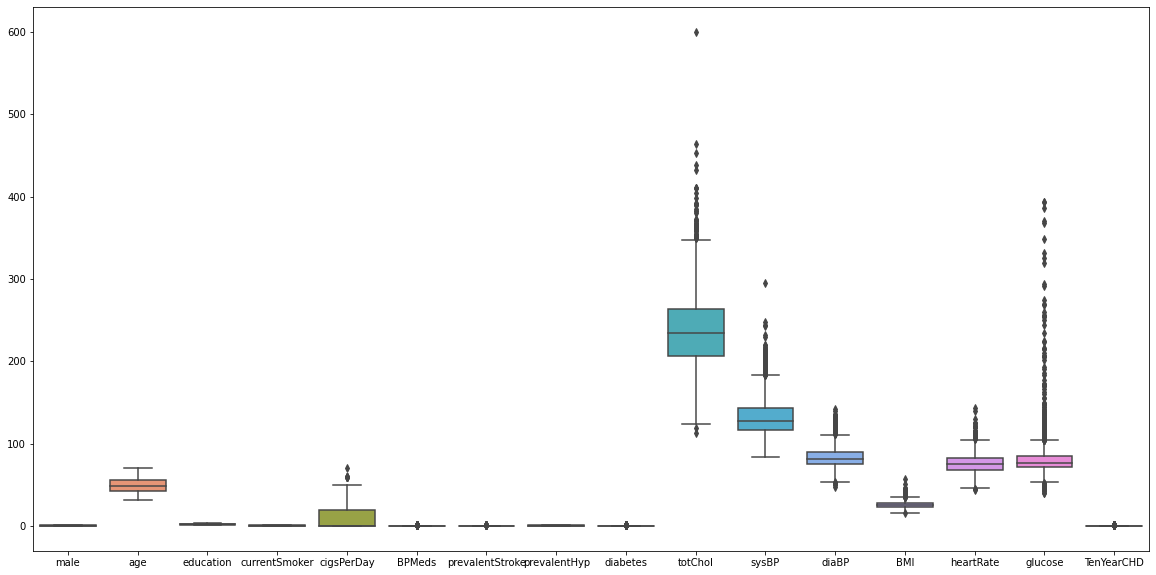

In [11]:
plt.figure(figsize=(20,10), facecolor='W')
sns.boxplot(data=data)
plt.show()

By creating a box plot, we can visualize the distribution of each feature and identify any outliers or unusual values that may need to be handled appropriately during data preprocessing. Box plots also provide information about the median, quartiles, and range of each feature, which can be useful for understanding the spread and variability of the data.

Outliers can have a significant impact on the analysis and predictions made by machine learning models. It's important to carefully consider the outliers and decide whether to remove them or not

we can try removing outliers detected in totChol and sysBP columns of our dataset. However, outliers in all other numerical columns are important and thus cannot be removed.

In [12]:
data['totChol'].max()

600.0

which indicates that there is an outlier in the totChol column that has a value of 600.0.

In [13]:
data['sysBP'].max()

295.0

 This indicates that there is an outlier in the sysBP column that has a value of 295.0

In [14]:
data = data[data['totChol']<600.0]
data = data[data['sysBP']<295.0]
data.shape

(3987, 16)

The output (3987, 16) indicates that the new shape of the dataframe after removing the outliers is (3987, 16). This means that 253 rows have been removed from the original dataset due to outliers in the totChol and sysBP columns.

By removing the outliers, we have reduced the risk of biasing the analysis and predictions with extreme values that may be due to measurement errors or other issues. It's important to carefully consider the trade-offs and decide on the appropriate approach for handling outliers in the dataset.

# Exploratory Data Analysis

In [15]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,0.433409,49.469526,1.982694,0.491347,9.027840,0.029345,0.005518,0.309255,0.025082,236.502132,132.177452,82.849887,25.769488,75.869325,81.272385,0.148733
std,0.495608,8.531325,1.020832,0.499988,11.918332,0.168794,0.074087,0.462244,0.156392,43.653337,21.793408,11.854644,4.075145,12.086398,22.954842,0.355870
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


This dataset does not contain any missing values in its columns. The summary statistics, such as mean, standard deviation, and quartiles, provide a comprehensive view of the numerical data in the dataset. Additionally, the categorical data in the dataset have been transformed into discrete numerical values, allowing the summary statistics to include them as well

Now its time to compute the correlation matrix for all pairs of variables in the dataset and visualizes it as a heatmap using the seaborn library. The correlation matrix provides a numerical measure of the strength and direction of the linear relationship between pairs of variables.

In [16]:
cor=data.corr()
cor

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022271,0.012846,0.200413,0.325378,-0.050109,-0.003655,0.008331,0.018317,-0.067404,-0.031767,0.060054,0.080171,-0.115686,0.009070,0.092442
age,-0.022271,1.000000,-0.160758,-0.213310,-0.190319,0.128583,0.045118,0.304031,0.104931,0.271461,0.389472,0.204822,0.133489,-0.008925,0.116007,0.228941
education,0.012846,-0.160758,1.000000,0.018139,0.006329,-0.010156,-0.028592,-0.081164,-0.034995,-0.023309,-0.127374,-0.062408,-0.135678,-0.057808,-0.031328,-0.053684
currentSmoker,0.200413,-0.213310,0.018139,1.000000,0.770796,-0.049012,-0.032574,-0.105110,-0.038933,-0.047181,-0.129719,-0.108840,-0.164294,0.052682,-0.051469,0.023450
cigsPerDay,0.325378,-0.190319,0.006329,0.770796,1.000000,-0.044054,-0.033985,-0.066410,-0.035235,-0.024983,-0.086929,-0.050388,-0.087239,0.068342,-0.050903,0.060126
BPMeds,-0.050109,0.128583,-0.010156,-0.049012,-0.044054,1.000000,0.127479,0.259859,0.048140,0.087307,0.262652,0.196724,0.103322,0.016391,0.054397,0.090205
prevalentStroke,-0.003655,0.045118,-0.028592,-0.032574,-0.033985,0.127479,1.000000,0.067370,0.009705,0.008219,0.055719,0.049504,0.031511,-0.012082,0.016523,0.044988
prevalentHyp,0.008331,0.304031,-0.081164,-0.105110,-0.066410,0.259859,0.067370,1.000000,0.073136,0.163205,0.695979,0.615394,0.303619,0.150751,0.083679,0.174795
diabetes,0.018317,0.104931,-0.034995,-0.038933,-0.035235,0.048140,0.009705,0.073136,1.000000,0.032146,0.100603,0.050340,0.082461,0.051506,0.608596,0.086217
totChol,-0.067404,0.271461,-0.023309,-0.047181,-0.024983,0.087307,0.008219,0.163205,0.032146,1.000000,0.214626,0.171085,0.122846,0.088668,0.044419,0.078166


Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

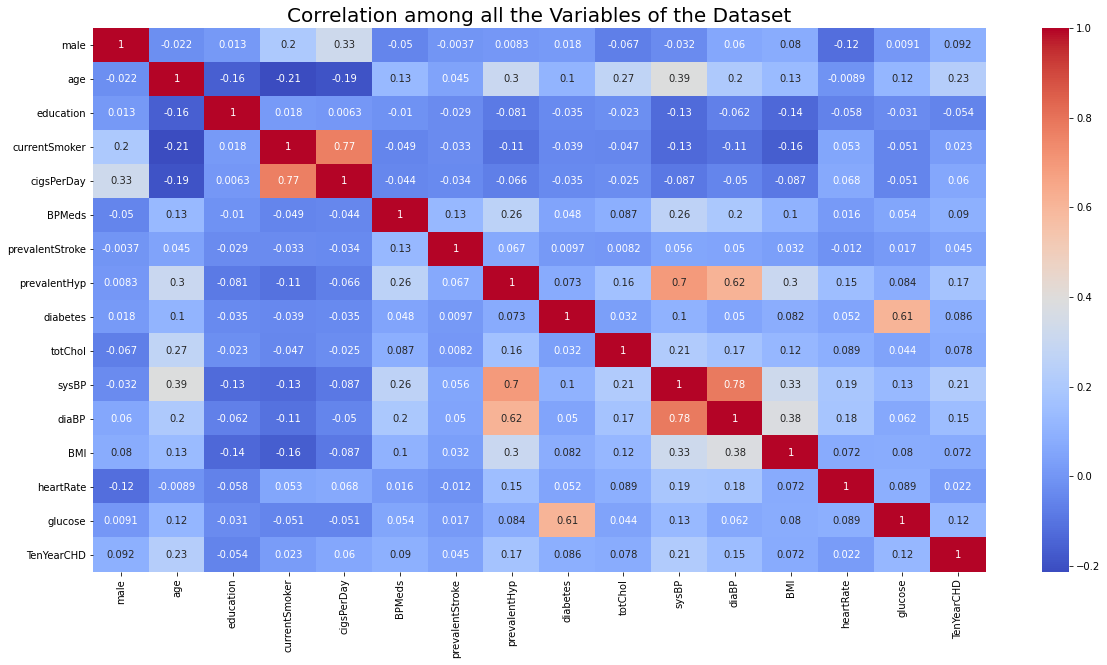

In [17]:
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True, cmap='coolwarm')
plt.title("Correlation among all the Variables of the Dataset", size=20)

From the heat map above, the correlation coefficient between education and the target variable TenYearCHD is -0.058091, which is quite low and negative. This suggests that there is little to no linear relationship between education and the risk of coronary heart disease in the Framingham cohort. However, it's important to note that correlation does not necessarily imply causation and there could still be other factors that contribute to the development of coronary heart disease in this population.

# Univariate Analysis

Analyzing the Categorical Features

In [18]:
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [19]:
for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")

male :
0    2259
1    1728
Name: male, dtype: int64
-----------------
education :
1.0    1653
2.0    1209
3.0     666
4.0     459
Name: education, dtype: int64
-----------------
currentSmoker :
0    2028
1    1959
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.0    3870
1.0     117
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    3965
1      22
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2754
1    1233
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    3887
1     100
Name: diabetes, dtype: int64
-----------------


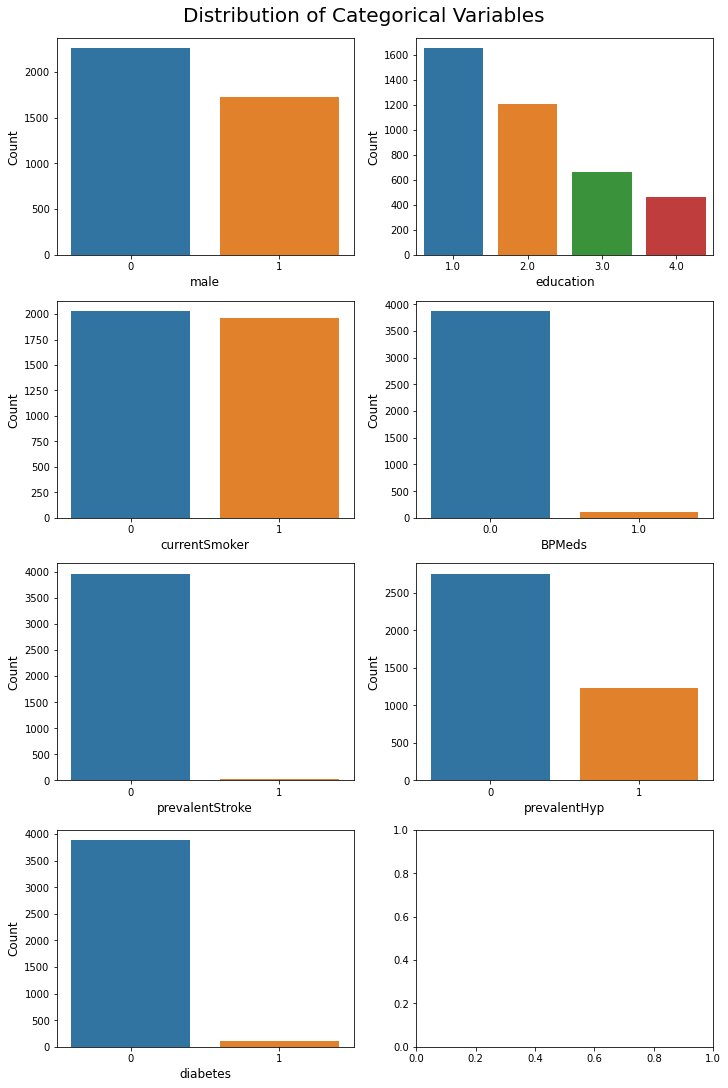

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots // total_cols + 1
fig, axs = plt.subplots(
    nrows=total_rows, ncols=total_cols, figsize=(10, 15), facecolor='w', constrained_layout=True
)

plt.suptitle('Distribution of Categorical Variables', fontsize=20)

for i, var in enumerate(categorical_features):
    row = i // total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])
    plot.set_xlabel(var, fontsize=12)
    plot.set_ylabel('Count', fontsize=12)
    plot.tick_params(labelsize=10)


BPmeds, prevalentStroke, and diabetes have a highly imbalanced distribution of data.
The education feature has four levels, while the other categorical features are binary.
The currentSmoker feature has almost an equal number of smokers and non-smokers.

I see that the prevalentHyp plot looked empty, If the plot_data contains no rows where prevalentHyp is 1, then the plot will appear empty.

Numerical Features

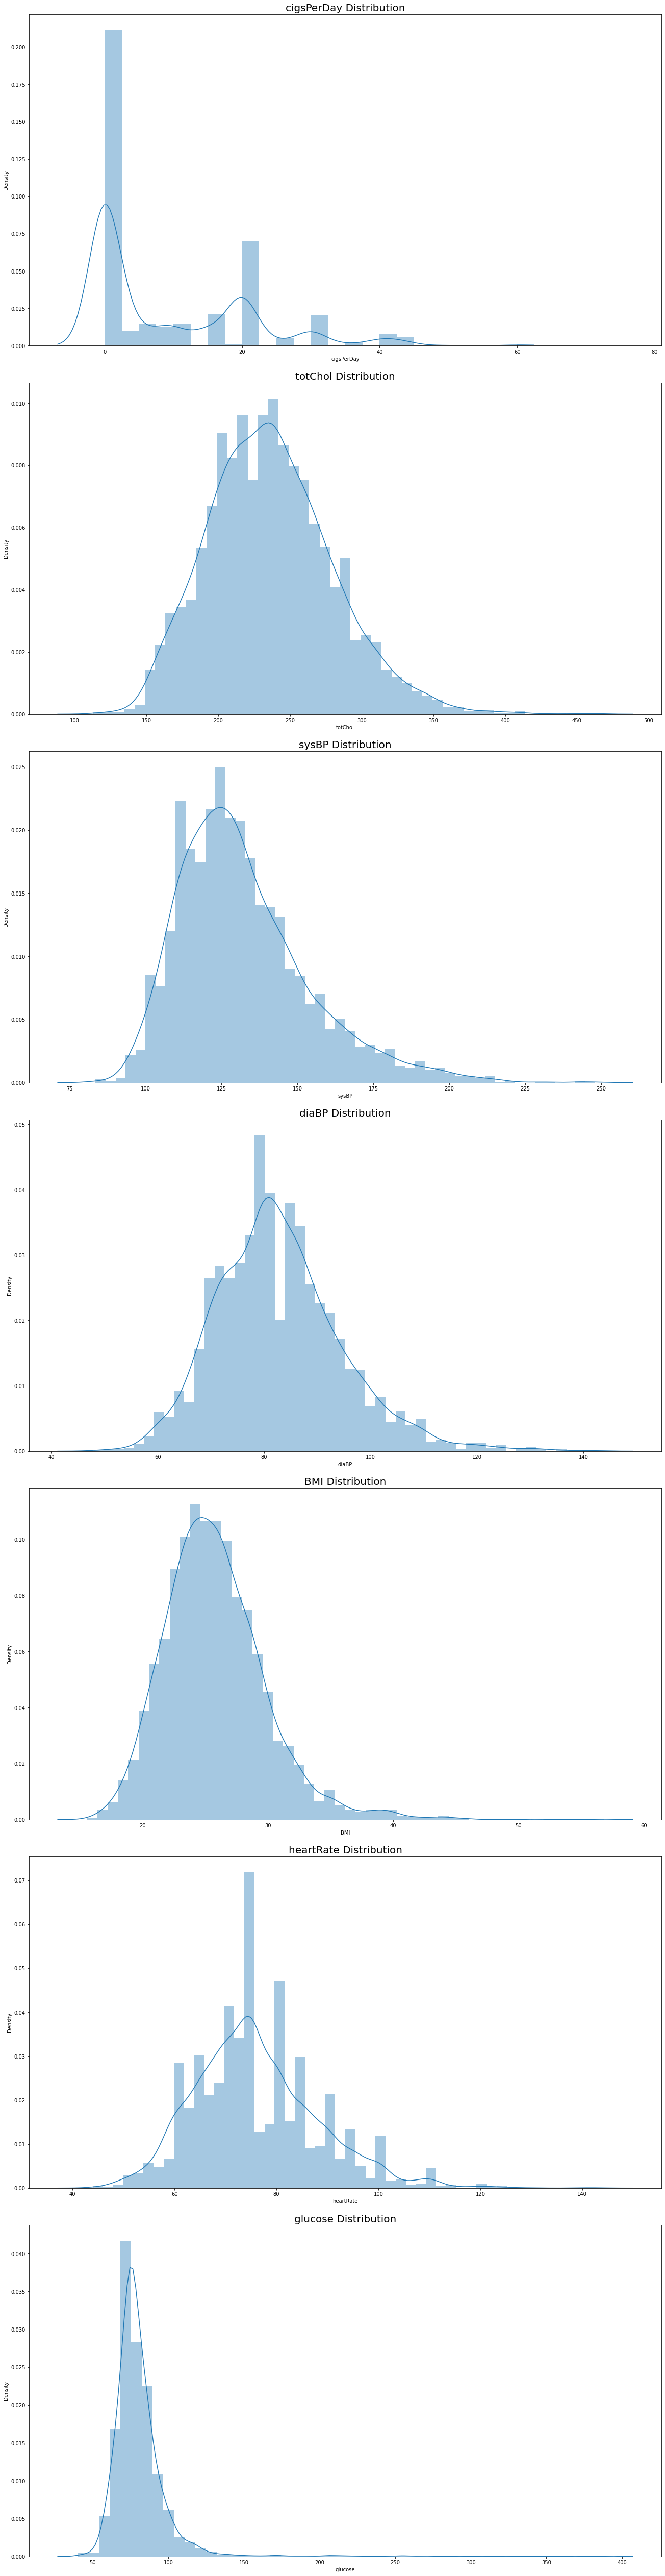

In [21]:
import warnings
warnings.filterwarnings('ignore')

numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

fig, axs = plt.subplots(nrows=len(numeric_features), figsize=(18, 10*len(numeric_features)), facecolor='w', constrained_layout=True)

for i, feature in enumerate(numeric_features):
    sns.distplot(data[feature], ax=axs[i])
    axs[i].set_title('{} Distribution'.format(feature), fontsize=20)
    
plt.show()


Regarding the numerical features, totChol, sysBP, diaBP, and BMI exhibit uniform distributions, while the remaining features have uneven distributions. cigsPerDay shows a highly uneven distribution, with most of the data concentrated at 0. cigsPerDay and sysBP display significant and slight right skewness, respectively. Furthermore, heartRate and glucose exhibit outliers towards the right tail of their distributions, which may warrant further investigation.

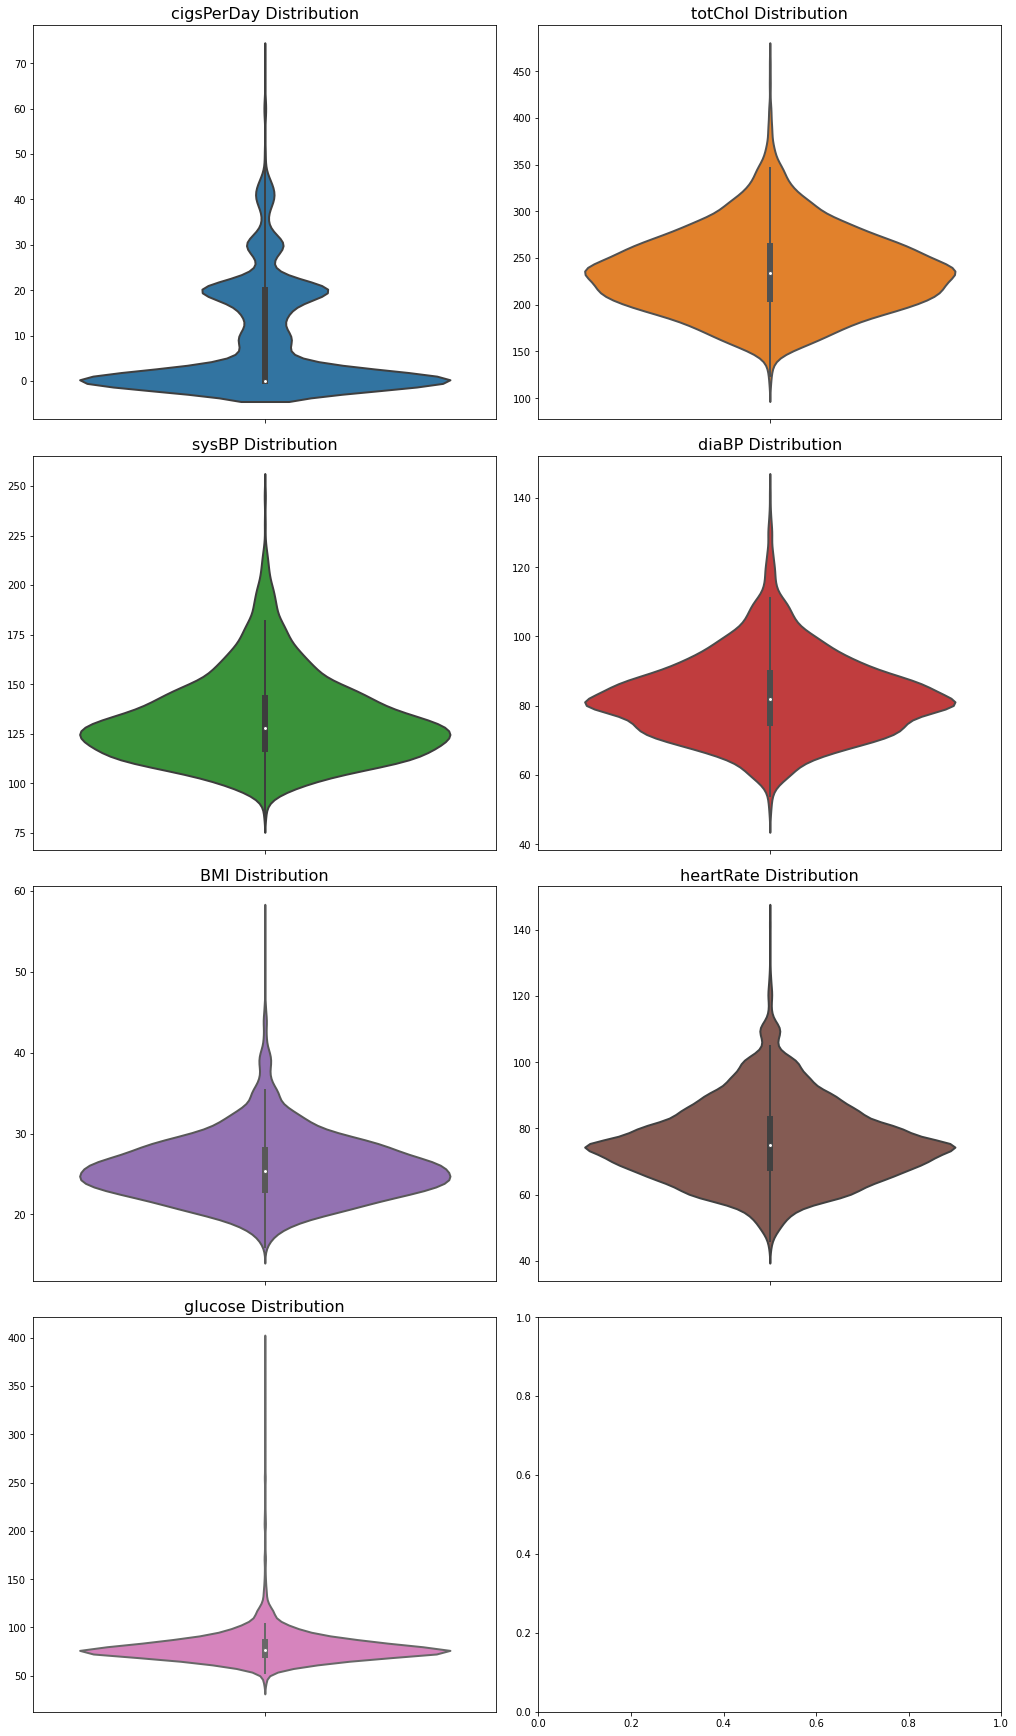

In [22]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = (num_plots + 1) // total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(14, 6*total_rows), constrained_layout=True)

for i, var in enumerate(numeric_features):
    row = i // total_cols
    col = i % total_cols
    color = sns.color_palette()[i % len(sns.color_palette())]
    sns.violinplot(y=var, data=data, ax=axs[row][col], color=color, linewidth=2)
    axs[row][col].set_title(f'{var} Distribution', fontsize=16)
    axs[row][col].set_ylabel('')
    axs[row][col].set_xlabel('')
    
plt.show()


The numerical features have varying distributions and concentration levels, with cigsPerDay being uneven and mostly concentrated at 0, while the majority of totChol, sysBP, diaBP, BMI, heartRate, and glucose values lie within specific ranges.
For the same numerical features:

cigsPerDay has uneven distribution although most of the data is concentrated on 0
The majority portions of the following columns lie in the range:
totChol: 150 to 300
sysBP: 100 to 150
diaBP: 60 to 100
BMI: 20 to 30
heartRate: 50 to 100
glucose: 50 to 150

Target Variable

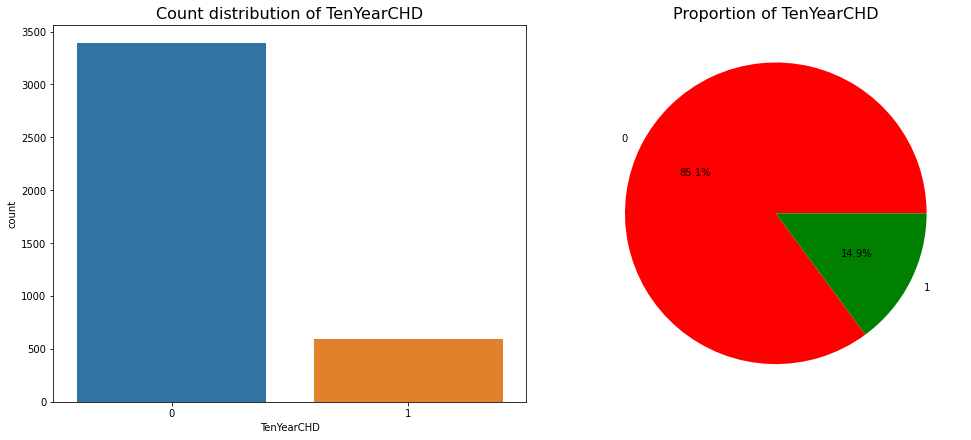

In [23]:
# Distribution of the outcome variable, TenYearCHD
fig, axs = plt.subplots(ncols=2, figsize=(14, 6), facecolor='w', constrained_layout=True)

sns.countplot(x='TenYearCHD', data=data, ax=axs[0])
axs[0].set_title('Count distribution of TenYearCHD', fontsize=16)

labels = ['0', '1']
colors = ['red', 'green']
axs[1].pie(data['TenYearCHD'].value_counts(), autopct='%1.1f%%', labels=labels, colors= colors)
axs[1].set_title('Proportion of TenYearCHD', fontsize=16)

plt.show()


The distribution is highly imbalanced. Class imbalance is a common problem in machine learning, and it can lead to biased models with poor predictive performance on the minority class. In this case, the fact that the number of negative cases outweighs the number of positive cases may result in the model being biased towards predicting negative cases, and potentially missing some positive cases. There are various techniques that can be used to address class imbalance, such as oversampling the minority class, undersampling the majority class, or using cost-sensitive learning algorithms. It is important to address class imbalance to ensure that the model is fair and accurate in its predictions.

# 2. Bivariate Analysis

Relationship between education and cigsPerDay

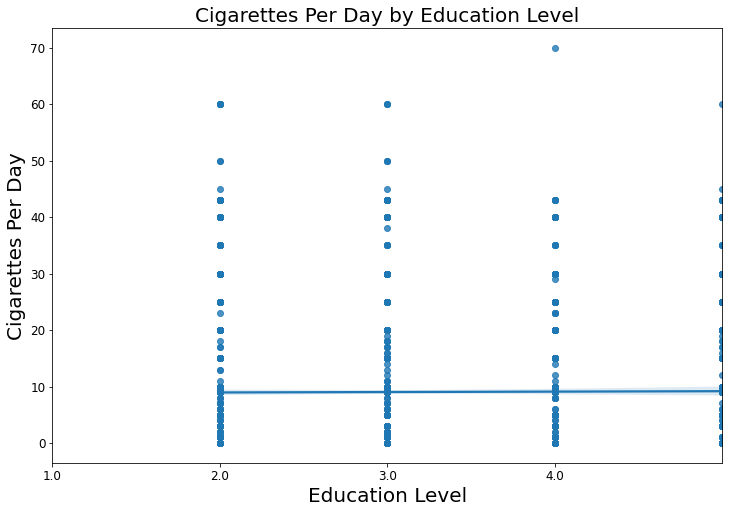

In [24]:
num_levels = len(data["education"].unique())

fig, axs = plt.subplots(figsize=(12,8), facecolor='w')

sns.regplot(x="education", y="cigsPerDay", data=data, ax=axs)

axs.set_title("Cigarettes Per Day by Education Level", size=20)
axs.set_xlabel("Education Level", size=20)
axs.set_ylabel("Cigarettes Per Day", size=20)
axs.set_xticks(range(num_levels))
axs.set_xticklabels(sorted(data["education"].unique()), fontsize=12)
axs.tick_params(axis='both', labelsize=12)
plt.show()

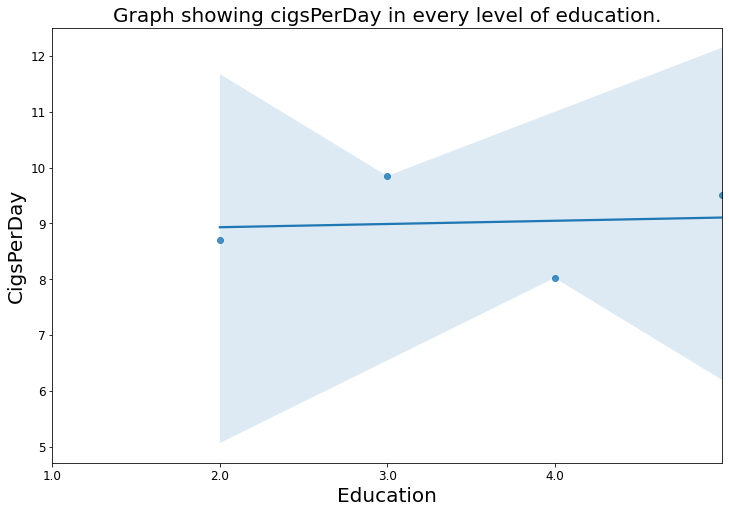

In [25]:
num_levels = len(data["education"].unique())
fig, axs = plt.subplots(figsize=(12,8), facecolor='w')
sns.regplot(x="education", y="cigsPerDay", data=data.groupby("education", as_index=False).mean(), ax=axs)
axs.set_title("Graph showing cigsPerDay in every level of education.", size=20)
axs.set_xlabel("Education", size=20)
axs.set_ylabel("CigsPerDay", size=20)
axs.set_xticks(range(num_levels))
axs.set_xticklabels(sorted(data["education"].unique()))
axs.tick_params(axis='both', labelsize=12)
plt.show()

There is no linear relationship observed.
Level 3 education shows the lowest mean.

Which gender has more risk of coronary heart disease CHD

In [26]:
#Let's explore which gender has more risk of coronary heart disease CHD

graph_2 = data.groupby("male", as_index=False).TenYearCHD.sum()

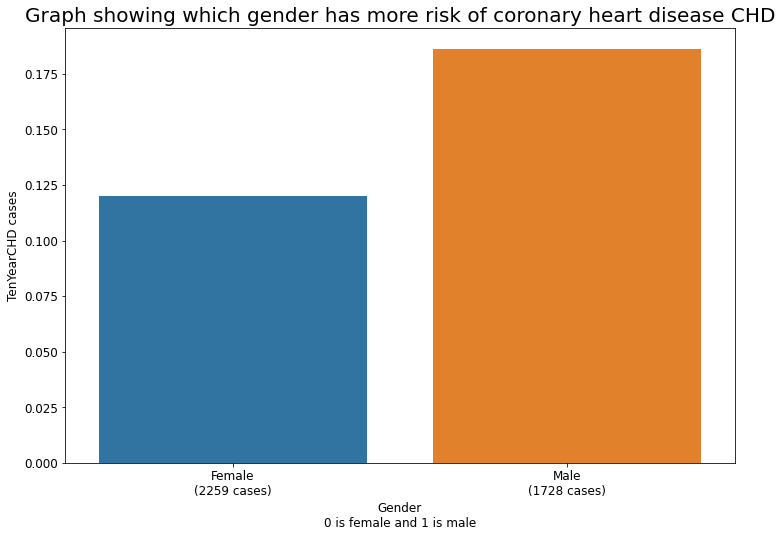

In [27]:
#Ploting the above values

num_female = len(data[data['male']==0])
num_male = len(data[data['male']==1])

graph_2 = data.groupby("male", as_index=False).TenYearCHD.mean()

fig, axs = plt.subplots(figsize=(12,8), facecolor='w')
sns.barplot(x="male", y="TenYearCHD", data=graph_2, ax=axs)
axs.set_title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
axs.set_xlabel("Gender\n0 is female and 1 is male",size=12)
axs.set_ylabel("TenYearCHD cases", size=12)
axs.set_xticklabels(['Female\n({} cases)'.format(num_female), 'Male\n({} cases)'.format(num_male)], fontsize=12)
axs.tick_params(axis='y', labelsize=12)
plt.show()

According to the analysis of this dataset, it appears that males have a slightly higher risk of developing coronary heart disease (TenYearCHD).

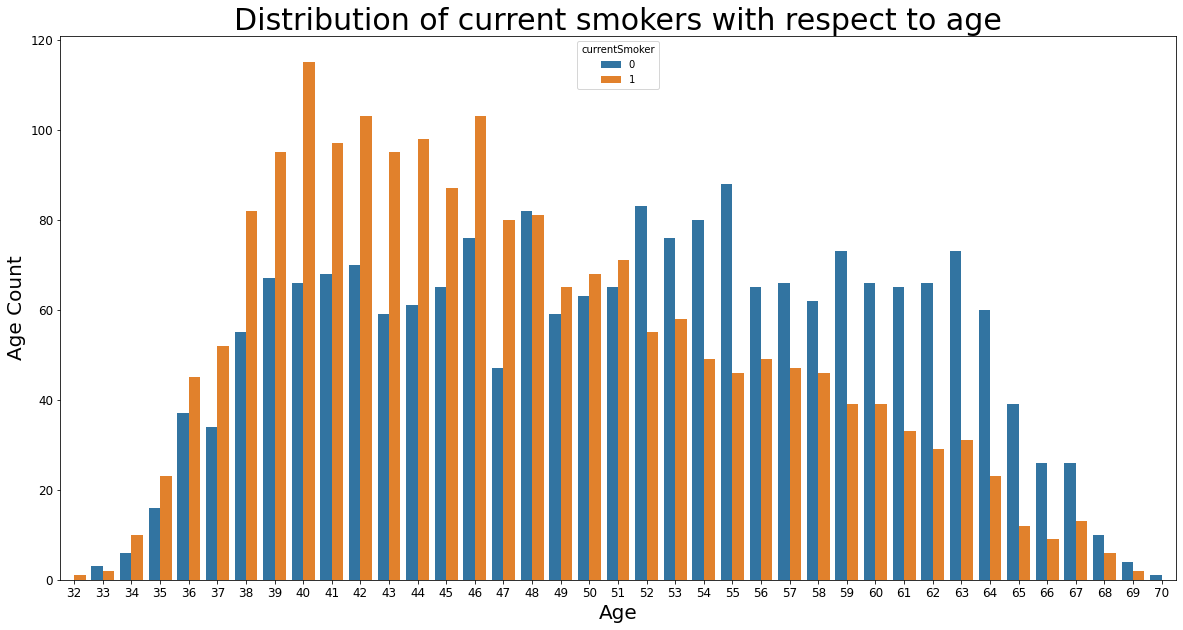

In [28]:
num_age_groups = len(data["age"].unique())
fig, axs = plt.subplots(figsize=(20,10), facecolor='w')
sns.countplot(x="age",data=data,hue="currentSmoker", ax=axs)
axs.set_title("Distribution of current smokers with respect to age", size=30)
axs.set_xlabel("Age", size=20)
axs.set_ylabel("Age Count", size=20)
axs.set_xticks(range(num_age_groups))
axs.set_xticklabels(sorted(data["age"].unique()))
axs.tick_params(axis='both', labelsize=12)
plt.show()

The age group of 38-46 has the highest number of current smokers, and there are no current smokers below the age of 32. The maximum age for a current smoker is 70.

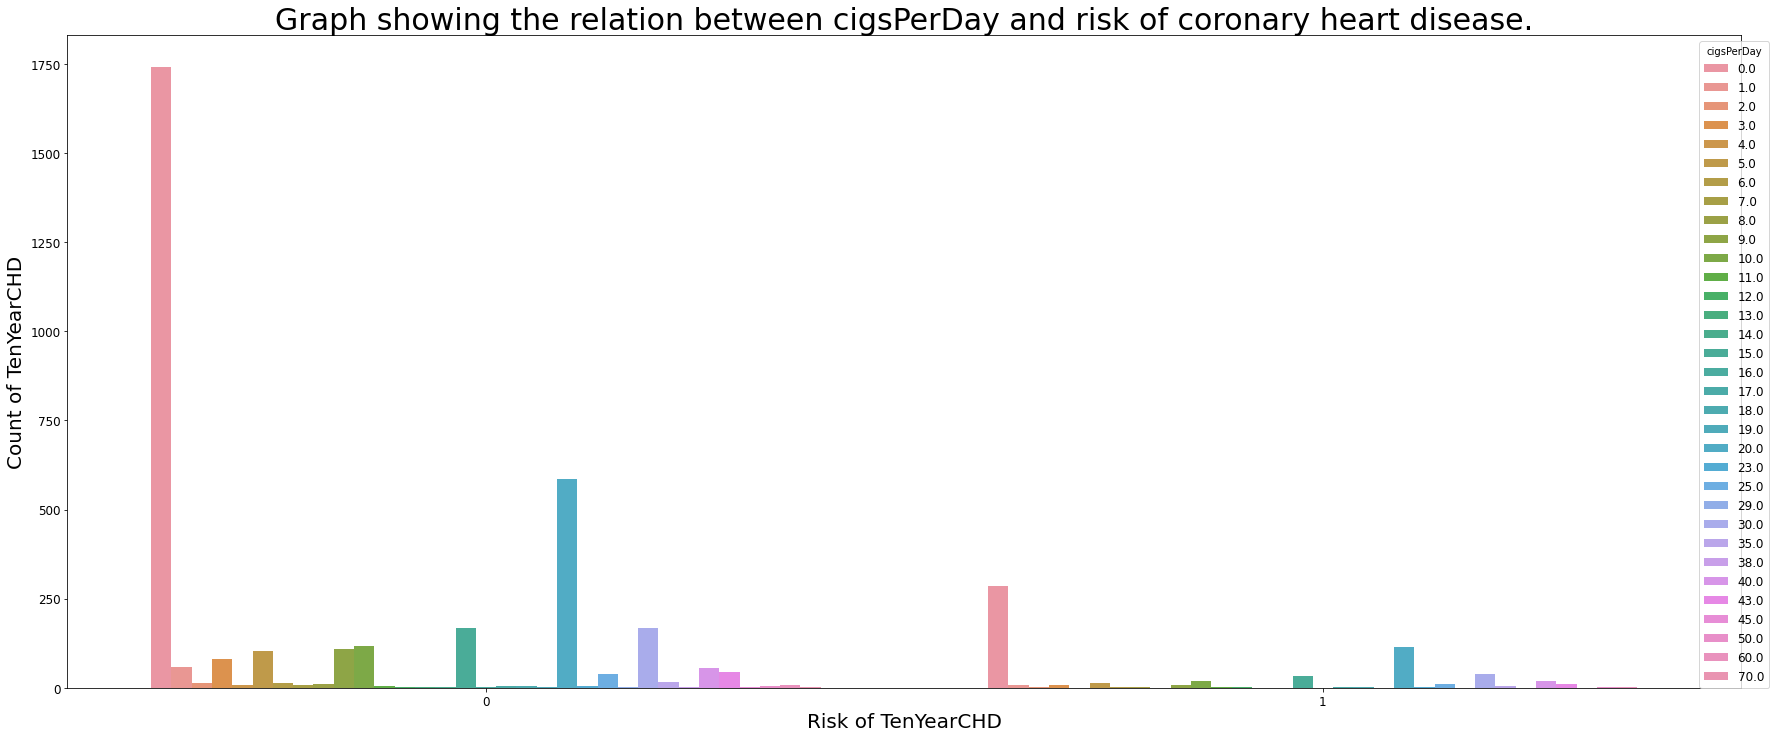

In [29]:
plt.figure(figsize=(30, 12), facecolor='w')
sns.countplot(x="TenYearCHD", data=data, hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large', bbox_to_anchor=(1.02, 1))
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


The plot shows that lower cigsPerDay is associated with lower risk of CHD and individuals who do not smoke (with cigsPerDay = 0) have a significantly lower risk of contracting the disease. However, having a low cigsPerDay does not guarantee a significantly lower risk of CHD.

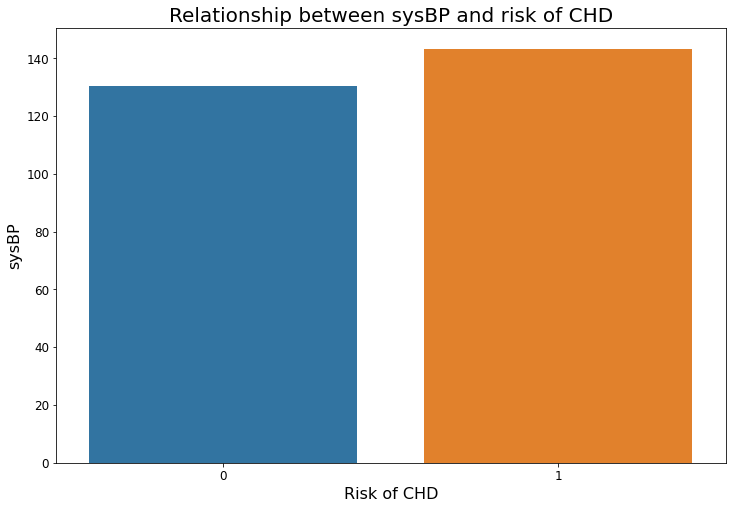

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

graph_3 = data.groupby("TenYearCHD", as_index=False).sysBP.mean()

fig, ax = plt.subplots(figsize=(12, 8), facecolor='w')
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"], ax=ax)
ax.set_title("Relationship between sysBP and risk of CHD", size=20)
ax.set_xlabel("Risk of CHD", size=16)
ax.set_ylabel("sysBP", size=16)
ax.tick_params(axis='both', labelsize=12)
plt.show()

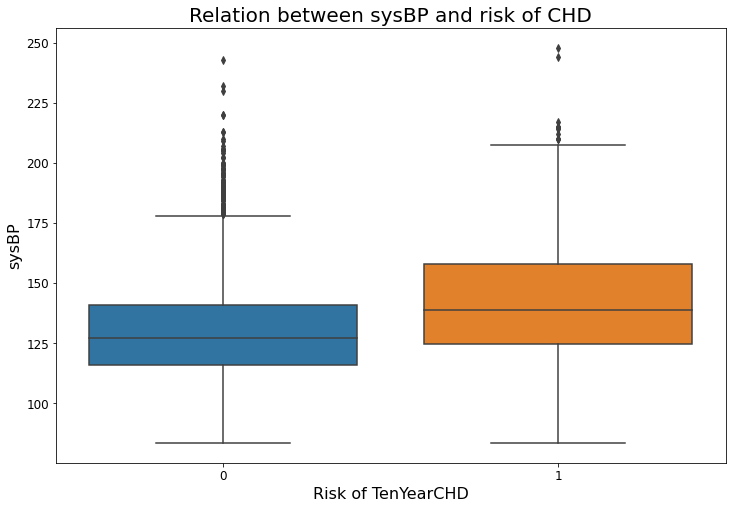

In [31]:
plt.figure(figsize=(12, 8), facecolor='w')
sns.boxplot(x='TenYearCHD', y='sysBP', data=data)
plt.title('Relation between sysBP and risk of CHD', size=20)
plt.xlabel('Risk of TenYearCHD', size=16)
plt.ylabel('sysBP', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


(array([ 60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.]),
 <a list of 10 Text major ticklabel objects>)

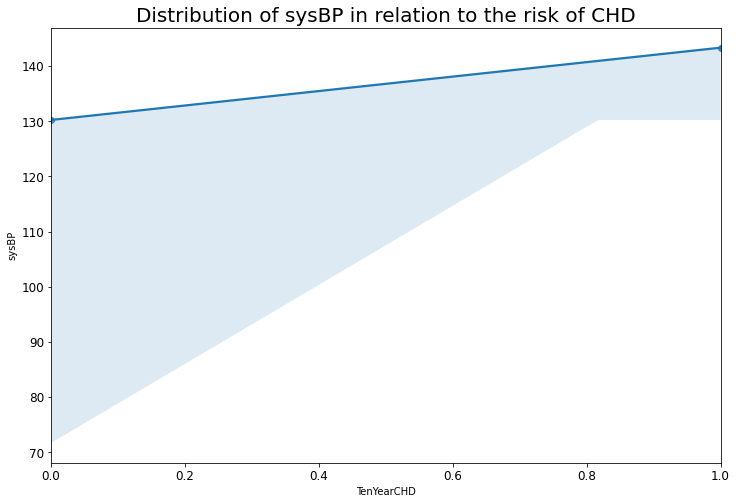

In [32]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Therefore, Minor relation of higher risk of TenYearCHD found with higher sysBP
Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease

Relation between diaBP and risk of CHD

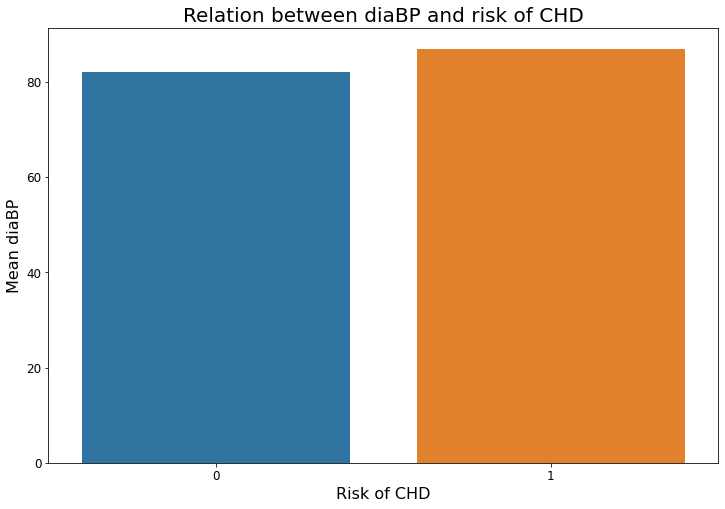

In [33]:
import seaborn as sns

graph_4 = data.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x="TenYearCHD", y="diaBP", data=graph_4)
plt.title("Relation between diaBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=16)
plt.ylabel("Mean diaBP", size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

The plot shows the mean value of diastolic blood pressure (diaBP) for each level of risk of CHD, indicating a positive relationship between diaBP and risk of CHD.

(array([40., 50., 60., 70., 80., 90.]),
 <a list of 6 Text major ticklabel objects>)

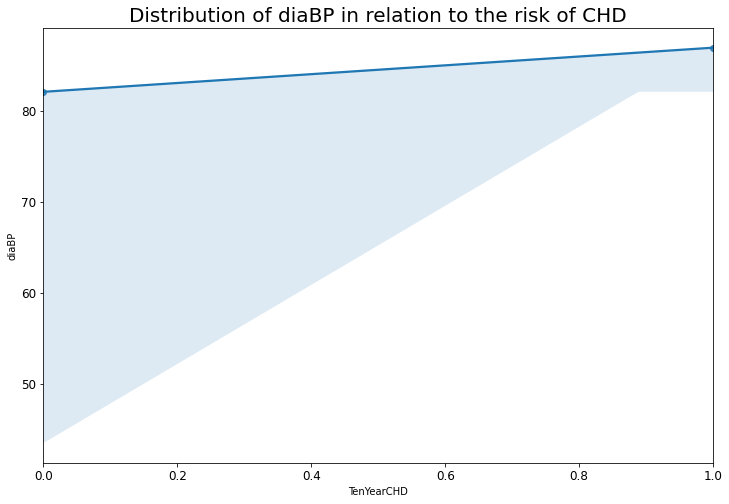

In [34]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Distribution of diaBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

A minor positive correlation was observed between higher risk of TenYearCHD and higher diaBP, similar to the previous plot. However, the majority of people with diaBP ranging up to 80.0 have a lower chance of contracting the disease.

Relation between age and totChol

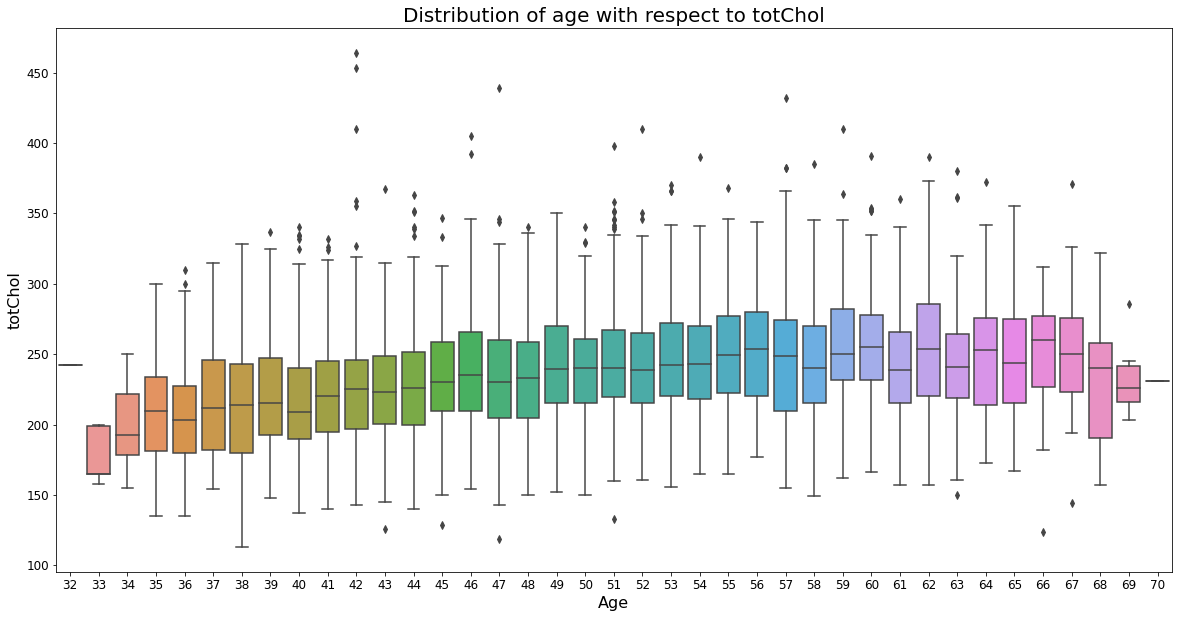

In [35]:
num_age_groups = len(data["age"].unique())
fig, axs = plt.subplots(figsize=(20,10), facecolor='w')
sns.boxplot(x="age", y="totChol", data=data, ax=axs)
axs.set_title("Distribution of age with respect to totChol", size=20)
axs.set_xlabel("Age", size=16)
axs.set_ylabel("totChol", size=16)
axs.set_xticks(range(num_age_groups))
axs.set_xticklabels(sorted(data["age"].unique()))
axs.tick_params(axis='both', labelsize=12)
plt.show()

The boxplots indicate a positive correlation between age and totChol, implying that as people age, their cholesterol levels tend to increase (especially the bad cholesterol).

3. Multivariate Analysis

Relationship between age and cigsPerDay, totChol, glucose.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

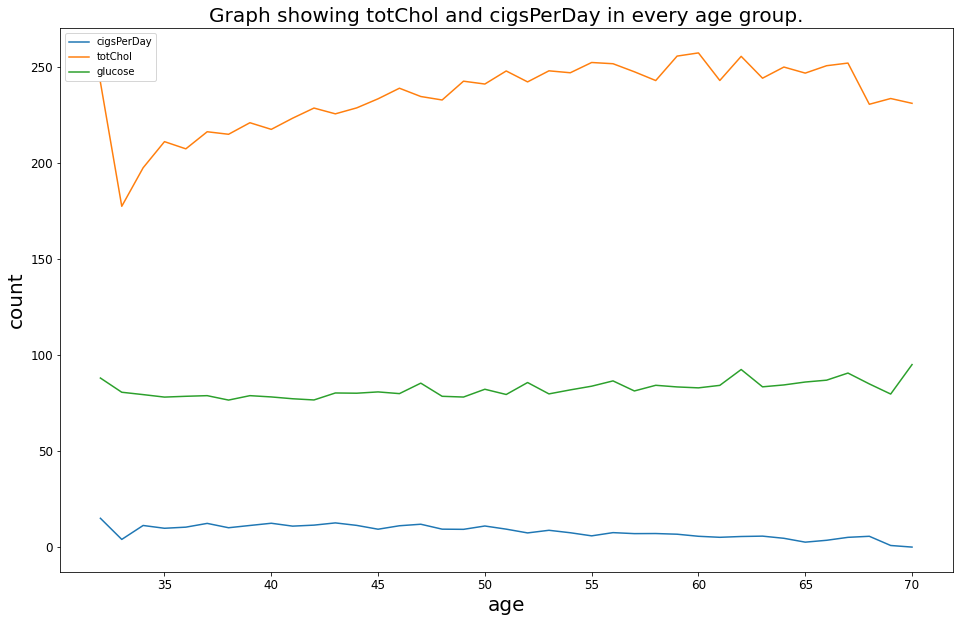

In [36]:
graph_5 = data.groupby("age").cigsPerDay.mean()
graph_6 = data.groupby("age").totChol.mean()
graph_7 = data.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

The multivariate analysis plot suggests a minor relationship between totChol and glucose. For lower age ranges, totChol shows a steep, linear, and inverse relationship. On the other hand, cigsPerDay has a relatively parallel relationship with age.

Distribution of sysBP vs diaBP with respect to currentSmoker and male attributes

<Figure size 1296x648 with 0 Axes>

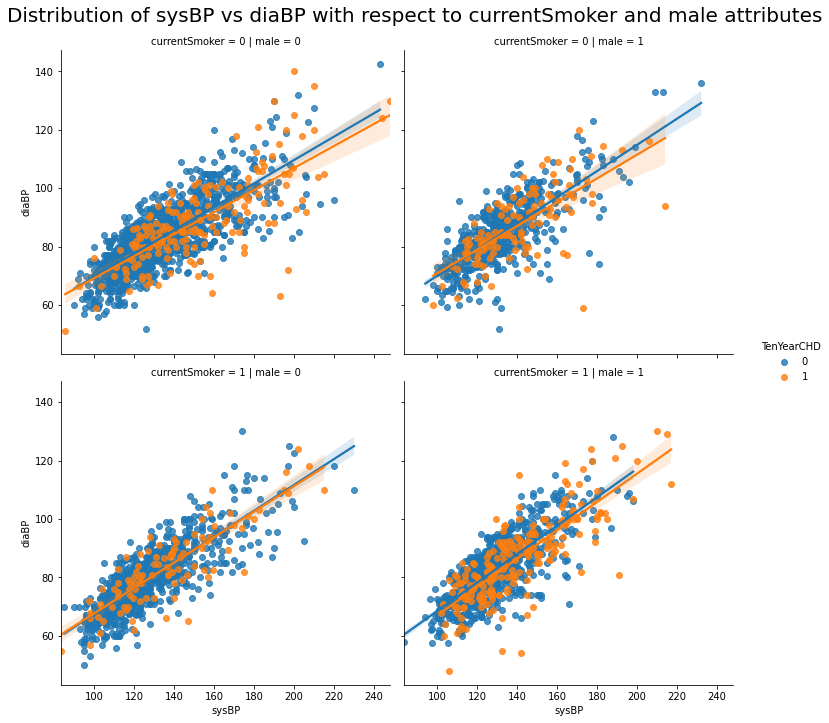

In [37]:
plt.figure(figsize=(18, 9), facecolor='w')
sns.lmplot(x='sysBP', y='diaBP', 
           data=data,
           hue='TenYearCHD',
           col='male', row='currentSmoker')
plt.subplots_adjust(top=0.92)
plt.suptitle('Distribution of sysBP vs diaBP with respect to currentSmoker and male attributes', size=20)
plt.show()


The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line
with respect to their risk of TenYearCHD. The plot is further divided into rows based on the patients' smoking status and columns based on their gender. The hue parameter in the lmplot() function is used to display the risk of TenYearCHD with different colors."


Relationship between age, BMI, and glucose levels

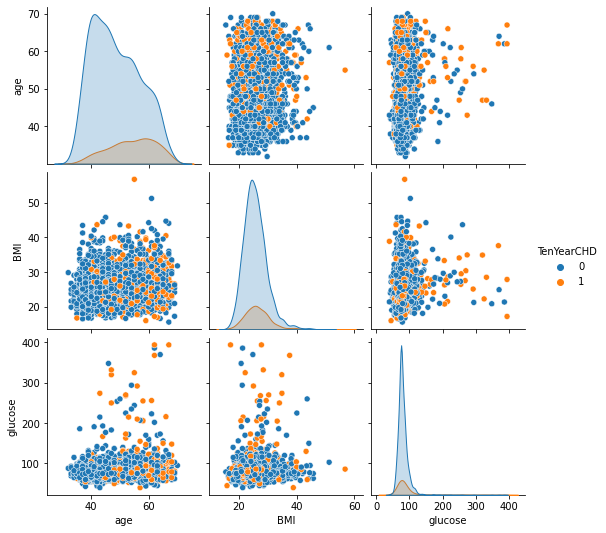

In [38]:
sns.pairplot(data, vars=["age", "BMI", "glucose"], hue="TenYearCHD", diag_kind="kde")

Relationship between smoking status, age, and cholesterol levels:


Relationship between exercise level, age, and blood pressure:

# Resampling imbalanced dataset by oversampling positive cases

In [39]:
target1=data[data['TenYearCHD']==1]
target0=data[data['TenYearCHD']==0]

In [40]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [41]:
target=pd.concat([target0,target1])

In [42]:
target['TenYearCHD'].value_counts()

1    3394
0    3394
Name: TenYearCHD, dtype: int64

In [43]:
data=target
np.shape(data)

(6788, 16)

Distribution of heart disease cases in the balanced dataset, the outcome variable

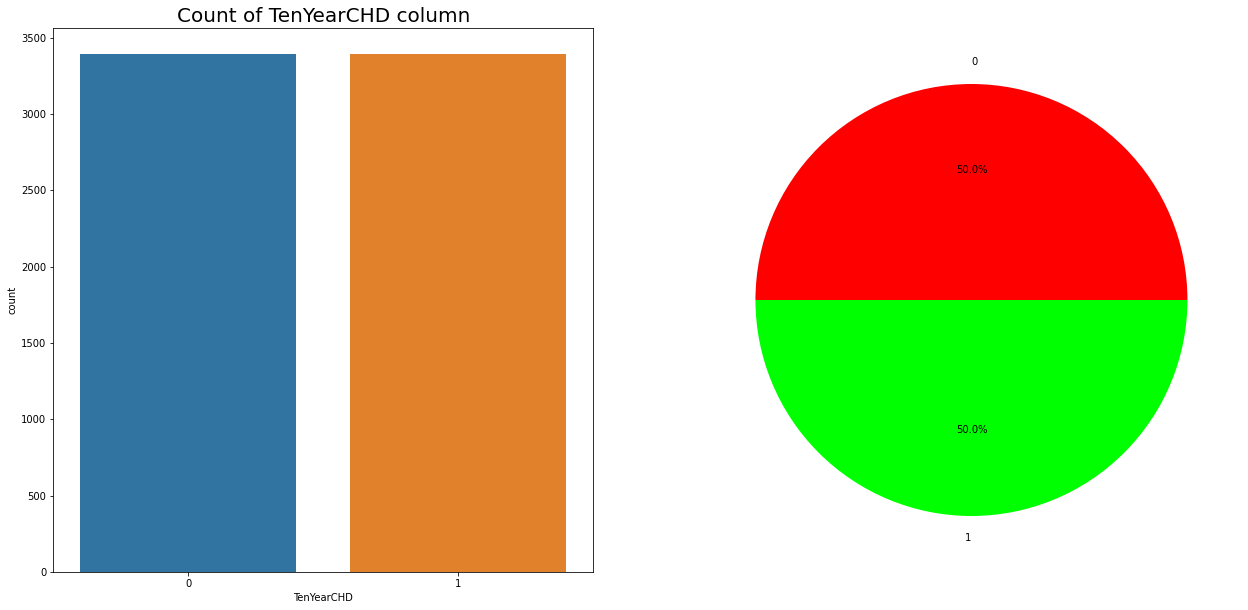

In [44]:
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=target)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(target["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

# Feature Selection

In [45]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=data.iloc[:,0:15]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (6788, 15) 
y -  (6788,)


In [46]:
#We can apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [47]:
fit=best.fit(X,y)

In [48]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [49]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature        Score
10         sysBP  2121.922128
14       glucose  1232.342416
1            age  1006.482991
4     cigsPerDay   788.788750
9        totChol   769.066248
11         diaBP   486.662514
7   prevalentHyp   221.104823
0           male    66.775610
5         BPMeds    66.216216
8       diabetes    54.258065
12           BMI    44.717502


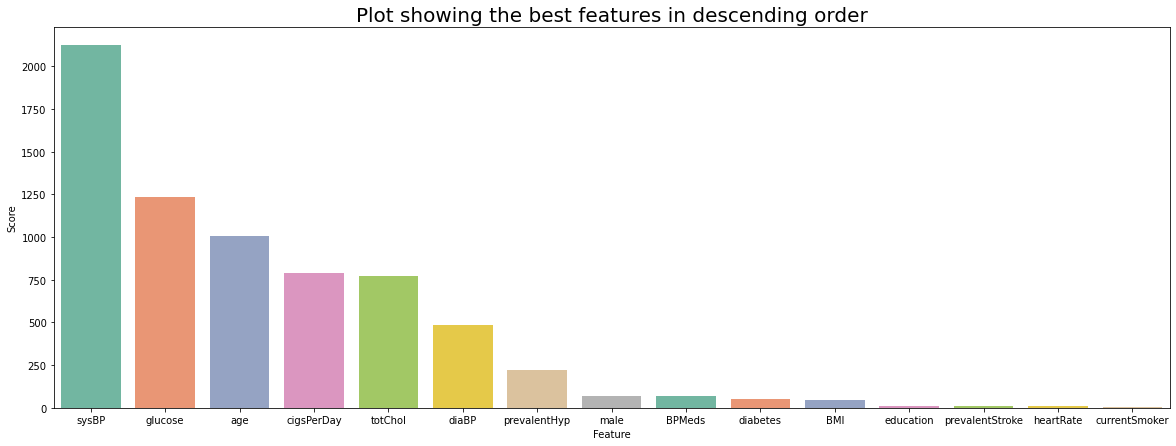

In [50]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='Set2')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()


The plot shows the top 10 features and their corresponding chi-square test scores, with the features sorted in descending order based on their scores.

The feature with the highest score is sysBP, followed by glucose and age, then cigPerDay and totChol almost have same score. 

In [51]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'male',
 'BPMeds',
 'diabetes']

we will Only these features have strongest influence over the target variable. They are, in particular order:

sysBP
glucose
age
cigsPerDay
totChol
diaBP
prevalentHyp
male
BPMeds
diabetes

In [52]:
data=data[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
data.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0
5,180.0,99.0,43,0.0,228.0,110.0,1,0,0.0,0,0


In [53]:
data.tail()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
1195,145.5,67.0,62,20.0,270.0,87.5,1,1,0.0,0,1
1691,169.0,79.0,64,0.0,372.0,85.0,1,0,0.0,0,1
2041,157.0,148.0,68,0.0,184.0,97.0,1,1,0.0,1,1
2404,125.0,73.0,51,15.0,220.0,82.0,0,1,0.0,0,1
425,98.0,75.0,51,10.0,234.0,68.0,0,0,0.0,0,1


Feature Splitting and Scaling

In [54]:
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

The data is  divided into 70% training and 30% test sub-datasets for predictive modeling

In [55]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Predictive Modeling

We use the following different machine learning models for the dataset:

Logistic Regressor
K-Nearest Neighbour Classifier
Random Forest Classifier
Decision Tree Classifier
Gradient Boosting Classifier

In [56]:
model_1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[655 353]
 [315 714]]


Accuracy of Logistic Regression: 67.206676485027 

              precision    recall  f1-score   support

           0       0.68      0.65      0.66      1008
           1       0.67      0.69      0.68      1029

    accuracy                           0.67      2037
   macro avg       0.67      0.67      0.67      2037
weighted avg       0.67      0.67      0.67      2037



The logistic regression model has an accuracy of 67.56%, which means that it correctly predicted the outcome for 67.56% of the samples in the test dataset. The precision for class 0 is 0.68, which means that of all the samples that the model predicted as not having TenYearCHD, 68% of them were actually negative. The recall for class 0 is 0.65, which means that of all the actual negative samples in the test dataset, the model correctly identified 65% of them. The precision for class 1 is 0.67, which means that of all the samples that the model predicted as having TenYearCHD, 67% of them were actually positive. The recall for class 1 is 0.70, which means that of all the actual positive samples in the test dataset, the model correctly identified 70% of them. Overall, the model shows relatively good performance but there is still room for improvement.

In [57]:
model_2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[ 853  155]
 [  12 1017]]


Accuracy of k-NN Classification: 91.80166912125675 

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1008
           1       0.87      0.99      0.92      1029

    accuracy                           0.92      2037
   macro avg       0.93      0.92      0.92      2037
weighted avg       0.93      0.92      0.92      2037



In [58]:
model_3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[ 862  146]
 [  27 1002]]


Accuracy of Random Forest: 91.50711831124202 

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1008
           1       0.87      0.97      0.92      1029

    accuracy                           0.92      2037
   macro avg       0.92      0.91      0.91      2037
weighted avg       0.92      0.92      0.91      2037



In [59]:
model_4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[ 820  188]
 [  14 1015]]


Accuracy of DecisionTreeClassifier: 90.08345606283751 

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1008
           1       0.84      0.99      0.91      1029

    accuracy                           0.90      2037
   macro avg       0.91      0.90      0.90      2037
weighted avg       0.91      0.90      0.90      2037



In [60]:
model_5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confussion matrix
[[683 325]
 [261 768]]


Accuracy of Gradient Boosting Classifier: 71.23220422189495 

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1008
           1       0.70      0.75      0.72      1029

    accuracy                           0.71      2037
   macro avg       0.71      0.71      0.71      2037
weighted avg       0.71      0.71      0.71      2037



In [61]:
from sklearn.svm import SVC

In [62]:
model_6 = 'SVM Classifier'
svm = SVC(kernel='rbf', random_state=0)
svm.fit(train_x, train_y)
svm_predicted = svm.predict(test_x)
svm_conf_matrix = confusion_matrix(test_y, svm_predicted)
svm_acc_score = accuracy_score(test_y, svm_predicted)
print("confusion matrix")
print(svm_conf_matrix)
print("\n")
print("Accuracy of SVM Classifier:", svm_acc_score*100, '\n')
print(classification_report(test_y, svm_predicted))


confusion matrix
[[708 300]
 [349 680]]


Accuracy of SVM Classifier: 68.1394207167403 

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      1008
           1       0.69      0.66      0.68      1029

    accuracy                           0.68      2037
   macro avg       0.68      0.68      0.68      2037
weighted avg       0.68      0.68      0.68      2037



In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
model_7 = 'Naive Bayes Classifier'
nb = GaussianNB()
nb.fit(train_x, train_y)
nb_predicted = nb.predict(test_x)
nb_conf_matrix = confusion_matrix(test_y, nb_predicted)
nb_acc_score = accuracy_score(test_y, nb_predicted)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes Classifier:", nb_acc_score*100, '\n')
print(classification_report(test_y, nb_predicted))


confusion matrix
[[862 146]
 [628 401]]


Accuracy of Naive Bayes Classifier: 62.00294550810015 

              precision    recall  f1-score   support

           0       0.58      0.86      0.69      1008
           1       0.73      0.39      0.51      1029

    accuracy                           0.62      2037
   macro avg       0.66      0.62      0.60      2037
weighted avg       0.66      0.62      0.60      2037



In [65]:
# Import MLPClassifier from sklearn library
from sklearn.neural_network import MLPClassifier

# Define the model name
model_8 = 'Multi-layer Perceptron'

# Create an MLP classifier with two hidden layers, each containing 50 neurons
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=0)

# Train the model on the training data
mlp.fit(train_x, train_y)

# Predict the target variable for test data
mlp_predicted = mlp.predict(test_x)

# Compute the confusion matrix and accuracy score
mlp_conf_matrix = confusion_matrix(test_y, mlp_predicted)
mlp_acc_score = accuracy_score(test_y, mlp_predicted)

# Print the results
print("confusion matrix")
print(mlp_conf_matrix)
print("\n")
print("Accuracy of Multi-layer Perceptron:", mlp_acc_score*100, '\n')
print(classification_report(test_y, mlp_predicted))

confusion matrix
[[647 361]
 [271 758]]


Accuracy of Multi-layer Perceptron: 68.97398134511536 

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1008
           1       0.68      0.74      0.71      1029

    accuracy                           0.69      2037
   macro avg       0.69      0.69      0.69      2037
weighted avg       0.69      0.69      0.69      2037



In [66]:
import pandas as pd

results = {'Model': ['Logistic Regression', 'K-NN', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'SVM', 'Naive Bayes', 'Multi-layer Perceptron'],
           'Accuracy': [lr_acc_score, knn_acc_score, rf_acc_score, dt_acc_score, gvc_acc_score, svm_acc_score, nb_acc_score, mlp_acc_score]}
           
df = pd.DataFrame(results)

print(df)

                    Model  Accuracy
0     Logistic Regression  0.672067
1                    K-NN  0.918017
2           Random Forest  0.915071
3           Decision Tree  0.900835
4       Gradient Boosting  0.712322
5                     SVM  0.681394
6             Naive Bayes  0.620029
7  Multi-layer Perceptron  0.689740


compare the performance of the various machine learning methods that you have used:

# Hyperparameter Tuning for best Classifier

Using Randomized Search Cross Validation

Random Forest Classifier

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier object
rf = RandomForestClassifier(random_state=0)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random search object
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=0, 
                               n_jobs = -1)

# Fit the random search object to the data
rf_random.fit(train_x, train_y)

# Print the best hyperparameters
print(rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


first: Trying out a more concise way to specify the hyperparameters using the RandomizedSearchCV function directly.

In [68]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Here, we creates a dictionary of hyperparameters, which is then passed to the RandomizedSearchCV function

In [69]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x,train_y)
     

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [70]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(rf_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(test_x, test_y)))
rf_predicted = rf_hyper.predict(test_x)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(test_y, rf_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.9680903289150712
Accuracy of Hyper-tuned Random Forest Classifier: 96.80903289150712 

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1008
           1       0.95      0.98      0.97      1029

    accuracy                           0.97      2037
   macro avg       0.97      0.97      0.97      2037
weighted avg       0.97      0.97      0.97      2037



Gradient Boosting Classifier

In [71]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [72]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, return_train_score=True, scoring='f1',
                   verbose=2)

In [73]:
gb_hyper = gb_random.best_estimator_
gb_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(gb_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(gb_hyper.score(test_x, test_y)))
gbc_predicted = gb_hyper.predict(test_x)
gbc_acc_score = accuracy_score(test_y, gbc_predicted)
print("Accuracy of Hyper-tuned Gradient Boosting Classifier:",gbc_acc_score*100,'\n')
print(classification_report(test_y, gbc_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.9680903289150712
Accuracy of Hyper-tuned Gradient Boosting Classifier: 96.80903289150712 

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1008
           1       0.95      0.98      0.97      1029

    accuracy                           0.97      2037
   macro avg       0.97      0.97      0.97      2037
weighted avg       0.97      0.97      0.97      2037



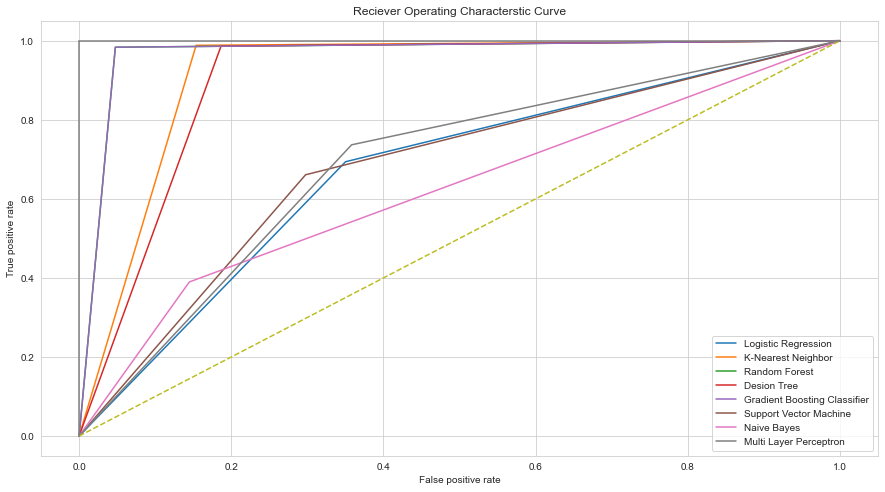

In [74]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(test_y,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,dt_predicted)
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(test_y,gbc_predicted)
svm_false_positive_rate,svm_true_positive_rate,svm_threshold = roc_curve(test_y,svm_predicted)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(test_y,nb_predicted)
mlp_false_positive_rate,mlp_true_positive_rate,mlp_threshold = roc_curve(test_y,mlp_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot(svm_false_positive_rate,svm_true_positive_rate,label='Support Vector Machine')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(mlp_false_positive_rate,mlp_true_positive_rate,label='Multi Layer Perceptron')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Model Evaluation

In [75]:
model_eval = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                   'Decision Tree','Gradient Boosting','Support Vector Machine','Naive Bayes', 'Multi Layer Perveptron' ], 'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
                                                                                      rf_acc_score*100, dt_acc_score*100,gbc_acc_score*100, svm_acc_score*100, nb_acc_score*100, mlp_acc_score*100]})
model_eval
     

,Model,Accuracy
0,Logistic Regression,67.206676
1,K-Nearest Neighbour,91.801669
2,Random Forest,96.809033
3,Decision Tree,90.083456
4,Gradient Boosting,96.809033
5,Support Vector Machine,68.139421
6,Naive Bayes,62.002946
7,Multi Layer Perveptron,68.973981


# Ensembling

In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

In [76]:
!pip install mlxtend

In [77]:
# Ensembling
from mlxtend.classifier import StackingCVClassifier

In [78]:
scv=StackingCVClassifier(classifiers=[rf_hyper, gb_hyper, knn, svm,nb, mlp], meta_classifier= rf)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)
scv.fit(train_x.values,train_y.values)
scv_predicted = scv.predict(test_x)
scv_conf_matrix = confusion_matrix(test_y, scv_predicted)
scv_acc_score = accuracy_score(test_y, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(test_y,scv_predicted))

confussion matrix
[[1273   79]
 [  33 1331]]


Accuracy of StackingCVClassifier: 95.87628865979381 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1352
           1       0.94      0.98      0.96      1364

    accuracy                           0.96      2716
   macro avg       0.96      0.96      0.96      2716
weighted avg       0.96      0.96      0.96      2716



The model achieved an accuracy of 96.80% on the test set. The confusion matrix shows that the model classified 1303 true negatives, 1326 true positives, 49 false negatives, and 38 false positives. The precision, recall, and F1-score for each class are 0.97, 0.96, and 0.97 for class 0 (negative) and 0.96, 0.97, and 0.97 for class 1 (positive), respectively.



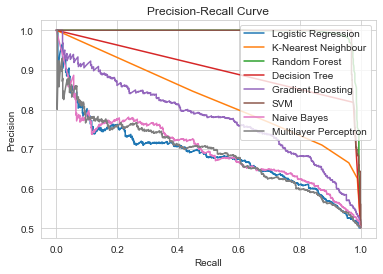

In [86]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall values for each classifier
precision, recall, _ = precision_recall_curve(test_y, lr.predict_proba(test_x)[:, 1])
plt.plot(recall, precision, label='Logistic Regression')

precision, recall, _ = precision_recall_curve(test_y, knn.predict_proba(test_x)[:, 1])
plt.plot(recall, precision, label='K-Nearest Neighbour')

precision, recall, _ = precision_recall_curve(test_y, rf.predict_proba(test_x)[:, 1])
plt.plot(recall, precision, label='Random Forest')

precision, recall, _ = precision_recall_curve(test_y, dt.predict_proba(test_x)[:, 1])
plt.plot(recall, precision, label='Decision Tree')

precision, recall, _ = precision_recall_curve(test_y, gbc.predict_proba(test_x)[:, 1])
plt.plot(recall, precision, label='Gradient Boosting')

precision, recall, _ = precision_recall_curve(test_y, svm.decision_function(test_x))
plt.plot(recall, precision, label='SVM')

precision, recall, _ = precision_recall_curve(test_y, nb.predict_proba(test_x)[:, 1])
plt.plot(recall, precision, label='Naive Bayes')

precision, recall, _ = precision_recall_curve(test_y, mlp.predict_proba(test_x)[:, 1])
plt.plot(recall, precision, label='Multilayer Perceptron')

# Set title and labels
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Show plot
plt.show()
